In [1]:
import geopandas as gpd
from shapely.ops import nearest_points
from shapely.geometry import Point
import random
from fiona.crs import from_epsg
import os, sys
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt

gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

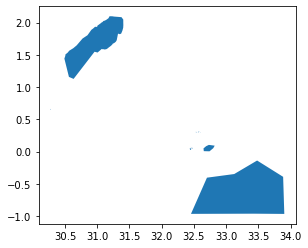

In [3]:
poly_fis = glob(r'./uganda_initial_no_AOIs/*.kml')
poly_df_list = [gpd.read_file(f, driver='KML') for f in poly_fis]
poly_df = gpd.GeoDataFrame(pd.concat(poly_df_list), crs=poly_df_list[0].crs)

poly_df.plot()
plt.show()
# yes_pts_fi = r'../../rwanda/B2P_Rwanda_bridge_sites_2019_05_08.shp'

# poly_df = gpd.read_file(poly_fi)
# yes_pts_df = gpd.read_file(yes_pts_fi)

In [8]:
# load the current bridge sites
uganda_bridge_xls = r'./uganda_initial_no_AOIs/Uganda All sites.xlsx'
#sheet_names = pd.ExcelFile(uganda_bridge_xls).sheet_names

uganda_yes_df = pd.read_excel(uganda_bridge_xls, engine='openpyxl') #, sheet_name=sheet_names[0])
uganda_yes_df.head()

,Opportunity Name,Form Name,Close Date,Stage,Sub-Stage,Bridge Type,Level 1 Government,Level 2 Government,GPS (Latitude),GPS (Longitude),Individuals Directly Served,B2P Fiscal Year,Flag for Rejection,Rejection Reason,Notes on site,Technical Concerns,Needs Assessment Comments
0,Uganda - Mihani-Karichadi - 1014455,Project Assessment - 2018.11.22,2021-12-31,Ready to Confirm,NaN,NaN,Western Region,Kasese,0.464045,30.139073,5195.0,2021,No,NaN,"Through the left hand side, the site is better...",NaN,NaN
1,Uganda - Busibi-Nyamba - 1014454,Project Assessment - 2018.11.22,2018-12-31,Identified,Identified in Needs Assessment,NaN,Western Region,Kasese,0.438299,30.160822,12400.0,2019,No,NaN,The site is not easily accessible except by fo...,NaN,NaN
2,Uganda - Nyakabugha-Bikone - 1014457,Project Assessment - 2018.11.22,2018-12-31,Identified,Identified in Needs Assessment,NaN,Western Region,Kasese,0.341503,30.052577,19265.0,2019,No,NaN,The site is not very well accessible at the mo...,NaN,NaN
3,Uganda - Kabingo-Busingo - 1014458,Project Assessment - 2018.11.22,2018-12-31,Identified,Identified in Needs Assessment,NaN,Western Region,Kasese,0.150543,29.926509,6000.0,2019,No,NaN,The accessibility to site is not so favorable ...,NaN,NaN
4,Uganda - Karujumba - 1014456,Project Assessment - 2018.11.22,2018-12-31,Identified,Identified in Needs Assessment,NaN,Western Region,Kasese,0.064435,29.911981,15755.0,2019,No,NaN,The site is generally well accessible as it ha...,NaN,NaN


In [9]:
uganda_yes_df[['GPS (Longitude)','GPS (Latitude)']].astype('float').dropna().values

array([[ 3.01390730e+01,  4.64045000e-01],
       [ 3.01608220e+01,  4.38299000e-01],
       [ 3.00525770e+01,  3.41503000e-01],
       [ 2.99265090e+01,  1.50543000e-01],
       [ 2.99119810e+01,  6.44350000e-02],
       [ 3.04220060e+01, -1.26645000e-01],
       [ 3.00996140e+01,  3.20219000e-01],
       [ 3.04269290e+01, -2.10705000e-01],
       [ 3.05704080e+01, -3.11150000e-02],
       [ 3.04372230e+01, -2.87358000e-01],
       [ 3.04514170e+01, -4.01170000e-02],
       [ 3.05402100e+01, -4.33600000e-02],
       [ 3.05699060e+01, -1.09694000e-01],
       [ 3.02030020e+01,  5.90396000e-01],
       [ 3.03076620e+01,  7.59376000e-01],
       [ 3.01727020e+01,  6.83200000e-01],
       [ 3.02970000e+01,  7.36377000e-01],
       [ 3.03173330e+01,  7.44009000e-01],
       [ 3.02867750e+01,  6.81862000e-01],
       [ 3.01741270e+01,  6.87666000e-01],
       [ 3.03395550e+01,  7.45246000e-01],
       [ 3.04841310e+01,  8.62348000e-01],
       [ 3.03473150e+01,  7.53969000e-01],
       [ 3.

In [10]:
uganda_yes_ptGeom = list(map(Point, uganda_yes_df[['GPS (Longitude)','GPS (Latitude)']].astype('float').dropna().values))

C:\software\anaconda3\envs\gbdx017\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


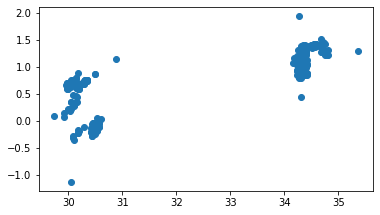

In [11]:
uganda_yes_gdf = gpd.GeoDataFrame({'geometry':uganda_yes_ptGeom}, crs=from_epsg(4326))
uganda_yes_gdf.plot()

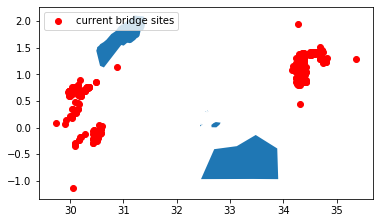

In [12]:
ax = poly_df.plot(label='no-polys')
uganda_yes_gdf.plot(ax=ax, c='r', label='current bridge sites')
plt.legend()
plt.show()

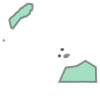

In [13]:
poly_df.geometry.unary_union

In [14]:
def random_points_within(poly, num_points, check_pts):
    """Generate <num_points> random points within a geometry.
    
    Parameters
    ---------------------------------
    poly: a Shapely Polygon geometry
        This is the geometry within which a random point will be generated.
    
    num_points: number of points to generate within the polygon
        See above.
    
    Usage Notes
    ---------------------------------
    This is a 'brute force' method in that a random point is generated within the *extent* of the geometry 
    until that point is within the actual geometry. For highly irregular polygons this could take a while.
    
    """
    
        
    min_x, min_y, max_x, max_y = poly.bounds

    points = []

    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            
            # check for distance
            if nearest_dist(random_point, check_pts, check_dist=1500):
                points.append(random_point)
                
                

    points_df = gpd.GeoDataFrame({'geometry': points}, crs=from_epsg(3857))
    
    return points_df.to_crs(epsg=4326)

def nearest_dist(rp, cp, check_dist=1500):
    """check distance of rp is less than check_dist of any points in cp.
    
    Parameters
    ---------------------------------
    rp: a Shapely Point geometry
        This is the random point to check against cp.
    
    cp: a GeoPandas GeoDataFrame containing Shapely Point geometries
        Contains point geometries to compare to rp.
        
    check_dist: float
        distance specified for point to be closest to any point in cp
    
    Usage Notes
    ---------------------------------
    This is a 'brute force' method in that a random point is generated within the *extent* of the geometry 
    until that point is within the actual geometry. For highly irregular polygons this could take a while.
    
    """
    
    min_distance = min_dist(rp, cp)
    
    return min_distance > check_dist
    
    
def min_dist(point, gpd2):
    #gpd2['Dist'] = gpd2.apply(lambda row:  point.distance(row['geometry']))
    gpd2['Dist'] = list(map(point.distance, gpd2['geometry']))
    geoseries = gpd2.iloc[gpd2['Dist'].argmin()]
    
    return gpd2['Dist'].min()

In [31]:
uganda_yes_df.shape

(323, 17)

In [32]:
uganda_no_gdf = random_points_within(poly_df.to_crs(epsg=3857)['geometry'].unary_union, uganda_yes_df.shape[0], uganda_yes_gdf.to_crs(epsg=3857))
# pts = random_points_within(poly_df.to_crs(epsg=3857)['geometry'][0], 1000, yes_pts_df.to_crs(epsg=3857))

C:\software\anaconda3\envs\gbdx017\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Figure size 1080x1080 with 0 Axes>

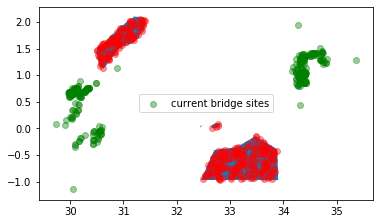

In [34]:
# add points to plot
plt.figure(figsize=(15,15))
ax = poly_df.plot(label='no-polys')
uganda_yes_gdf.plot(ax=ax, c='g', alpha=0.4, label='current bridge sites')
uganda_no_gdf.plot(ax=ax, c='r', alpha=0.4)
plt.legend()
plt.show()

In [78]:
pts.to_file(r'../../rwanda/rwanda_no_pts_1000.shp')

In [85]:
lakes = gpd.read_file('../../rwanda/RWA_water.gpkg', layer='lakes')

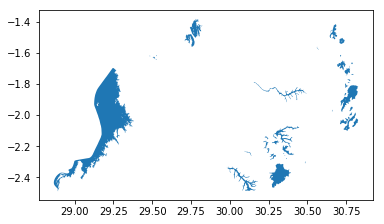

In [88]:
lakes.plot()

In [101]:
poly_minus_lakes = poly_df.difference(lakes.unary_union).unary_union
poly_minus_lakes_df = gpd.GeoDataFrame({'geometry':[poly_minus_lakes]}, crs=from_epsg(4326))



In [102]:
pts_minus_lakes = random_points_within(poly_minus_lakes_df.to_crs(epsg=3857)['geometry'][0], 1000, yes_pts_df.to_crs(epsg=3857))

C:\software\anaconda3\envs\eapy_gbdx\lib\site-packages\ipykernel_launcher.py:67: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


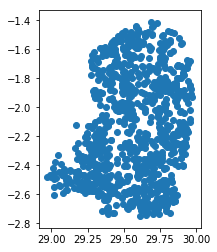

In [103]:
pts_minus_lakes.plot()

In [104]:
pts_minus_lakes.to_file(r'../../rwanda/rwanda_no_pts_1000_minus_lakes.shp')

C:\software\anaconda3\envs\eapy_gbdx\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
